<a href="https://colab.research.google.com/github/tcc3281/Classification-of-airline-passenger-satisfaction/blob/master/model/neutral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Loading and Exploring Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import tensorflow as tf

## 2.1 Loading the Data

In [3]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')

data=pd.concat([data_train,data_test],sort=False)

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2.2 Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

# 3. Data Preprocessing

In [6]:
data=data.drop(['Unnamed: 0','id'],axis=1)

In [7]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

## 3.1. Handling Missing Values

In [8]:

data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [9]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

<ipython-input-9-49c9ec6565d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


## 3.2. Transforming Data

In [10]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)

## 3.3. Handling Duplicate Values

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop_duplicates(inplace=True)

## 3.4. Encoding Categorical Variables

In [13]:
label_encoder = LabelEncoder()
header={
    'Gender': ['Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'disloyal Customer'],
    'Type of Travel': ['Personal Travel', 'Business travel'],
    'Class': ['Eco', 'Eco Plus', 'Business'],
    'satisfaction': ['neutral or dissatisfied', 'satisfied']
}
for key in header:
    data[key] = label_encoder.fit_transform(data[key])
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,3.218876,2.890372,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,0.000000,1.791759,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.000000,0.000000,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,2.397895,2.197225,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0.000000,0.000000,1


## 3.5. Feature Scaling

In [14]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data.head()

<ipython-input-14-6f4d80af6170>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01487815  1.01487815 -0.98533997 ... -0.98533997  1.01487815
 -0.98533997]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
<ipython-input-14-6f4d80af6170>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.47342178  2.11228136 -0.47342178 ... -0.47342178 -0.47342178
 -0.47342178]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
<ipython-input-14-6f4d80af6170>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.74796145 -0.954274   -0.88813338 ... -1.48339897 -1.68182083
  0.17011655]' has

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.014878,-0.473422,-1.747961,1.493951,2.262940,-0.732184,0.204090,0.617265,0.173445,-1.546267,...,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,1.267390,1.038841,0
1,1.014878,2.112281,-0.954274,-0.669366,-0.955724,-0.957760,0.204090,-0.692719,0.173445,0.018048,...,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.728840,0.361193,0
2,-0.985340,-0.473422,-0.888133,-0.669366,-0.955724,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,...,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.728840,-0.744004,1
3,-0.985340,-0.473422,-0.954274,-0.669366,-0.955724,-0.629924,-0.548166,1.272257,1.600249,1.582364,...,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,0.758248,0.611293,0
4,1.014878,-0.473422,1.426788,-0.669366,-0.955724,-0.978814,0.204090,-0.037727,0.173445,0.018048,...,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.728840,-0.744004,1


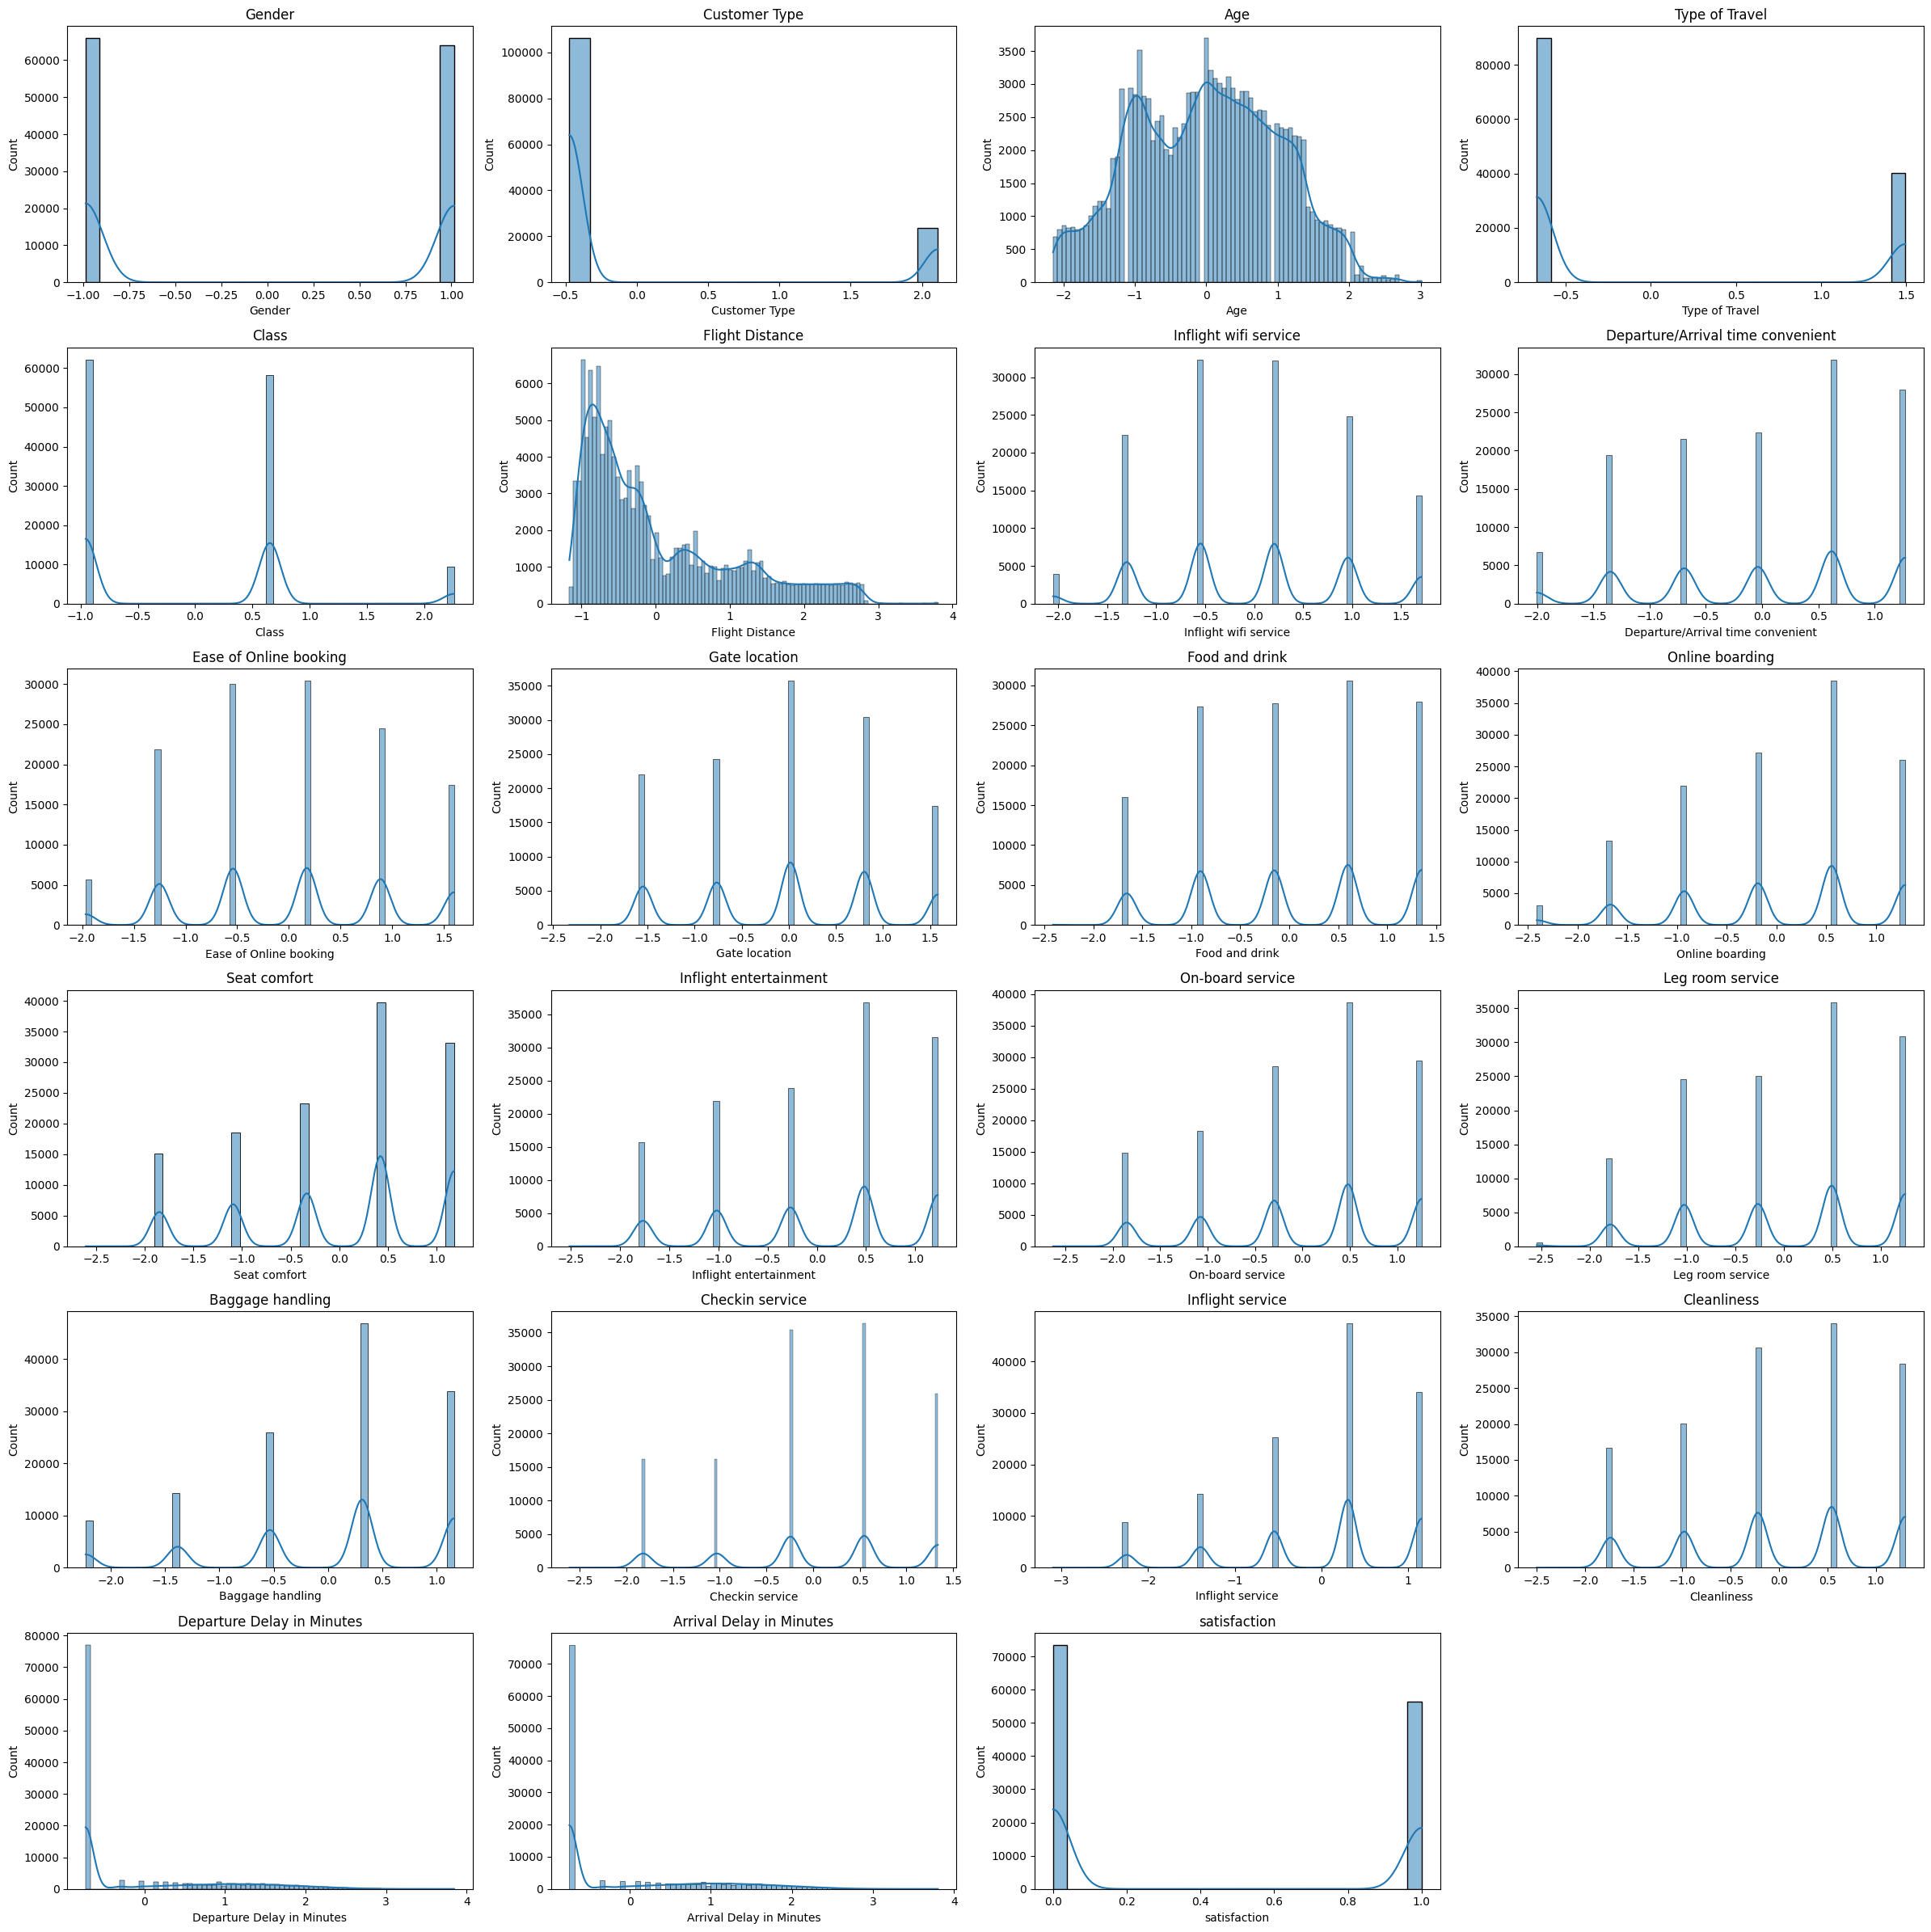

In [15]:
plt.figure(figsize=(24, 24))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [16]:
data.corr()['satisfaction']

,satisfaction
Gender,0.011236
Customer Type,-0.186017
Age,0.134091
Type of Travel,-0.449861
Class,-0.448193
Flight Distance,0.298085
Inflight wifi service,0.283460
Departure/Arrival time convenient,-0.054270
Ease of Online booking,0.168877
Gate location,-0.002793


In [17]:
data = data.T.drop_duplicates().T

# 4. Building the Model

In [47]:
train = data[data['satisfaction'].notnull()]
test = data[data['satisfaction'].isnull()]
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

In [48]:
threadhold = 0.15
correlation = data.corr()['satisfaction']
selected_features = correlation[(correlation > threadhold) | (correlation < -threadhold)].index
selected_features = selected_features.drop('satisfaction')
X = X[selected_features]

In [49]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

tf_X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
tf_X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
tf_X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
tf_y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
tf_y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)
tf_y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [50]:
BATCH_SIZE = 32
EPOCH = 100

In [51]:
input_size = X_train.shape[1]
hiden1_size = 512
hiden2_size = 128
hiden3_size = 32
hiden4_size = 16
output_size = 1
print(f'Input size: {input_size}, Hiden1 size: {hiden1_size}, Hiden2 size: {hiden2_size}, Output size: {output_size}')

Input size: 16, Hiden1 size: 512, Hiden2 size: 128, Output size: 1


In [52]:
# Định nghĩa các lớp của mô hình
input_layer = tf.keras.layers.Input(shape=(input_size,))
hiden_layer1 = tf.keras.layers.Dense(units=hiden1_size)(input_layer)
batch_norm1 = tf.keras.layers.BatchNormalization()(hiden_layer1)
activation1 = tf.keras.layers.Activation(tf.nn.relu)(batch_norm1)
dropout1 = tf.keras.layers.Dropout(0.25)(activation1)

hiden_layer2 = tf.keras.layers.Dense(units=hiden2_size)(dropout1)
batch_norm2 = tf.keras.layers.BatchNormalization()(hiden_layer2)
activation2 = tf.keras.layers.Activation(tf.nn.relu)(batch_norm2)
dropout2 = tf.keras.layers.Dropout(0.25)(activation2)

hiden_layer3 = tf.keras.layers.Dense(units=hiden3_size)(dropout2)
batch_norm3 = tf.keras.layers.BatchNormalization()(hiden_layer3)
activation3 = tf.keras.layers.Activation(tf.nn.relu)(batch_norm3)
dropout3 = tf.keras.layers.Dropout(0.25)(activation3)

hiden_layer4 = tf.keras.layers.Dense(units=hiden4_size)(dropout3)
batch_norm4 = tf.keras.layers.BatchNormalization()(hiden_layer4)
activation4 = tf.keras.layers.Activation(tf.nn.relu)(batch_norm4)
dropout4 = tf.keras.layers.Dropout(0.5)(activation4)

output_layer = tf.keras.layers.Dense(units=output_size, activation=tf.nn.sigmoid)(dropout4)

# Tạo mô hình
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# In ra cấu trúc của mô hình
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,793 (319.50 KB)

 Trainable params: 80,417 (314.13 KB)

 Non-trainable params: 1,376 (5.38 KB)

In [53]:
#loss function
# Định nghĩa hàm mất mát và bộ tối ưu hóa
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
initial_learning_rate=0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.97,
    staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [54]:
# Compile mô hình
model.compile(optimizer=optimizer, loss=loss_fn, metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    min_delta=0.01
)

In [55]:
history = model.fit(tf_X_train, tf_y_train, epochs=EPOCH, validation_data=(tf_X_val, tf_y_val), batch_size=BATCH_SIZE)

Epoch 1/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - binary_accuracy: 0.8778 - loss: 0.3111 - precision_1: 0.8834 - recall_1: 0.8253 - val_binary_accuracy: 0.9473 - val_loss: 0.1381 - val_precision_1: 0.9633 - val_recall_1: 0.9144
Epoch 2/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - binary_accuracy: 0.9268 - loss: 0.2009 - precision_1: 0.9266 - recall_1: 0.9020 - val_binary_accuracy: 0.9514 - val_loss: 0.1262 - val_precision_1: 0.9603 - val_recall_1: 0.9274
Epoch 3/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - binary_accuracy: 0.9333 - loss: 0.1824 - precision_1: 0.9352 - recall_1: 0.9103 - val_binary_accuracy: 0.9526 - val_loss: 0.1178 - val_precision_1: 0.9635 - val_recall_1: 0.9269
Epoch 4/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - binary_accuracy: 0.9361 - loss: 0.1709 - precision_1: 0.9360 - recall_1: 0.9158 - val_binary_accuracy: 0.9543 - val_loss: 0.1106 - val_precision_1: 0.9594 - val_recall_1: 0.9353
Epoch 5/100
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step 

In [56]:
tf_X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(tf_X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_train=model.predict(X_train)
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_val=model.predict(X_val)
y_pred_val_binary = (y_pred_val > 0.5).astype(int)

406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


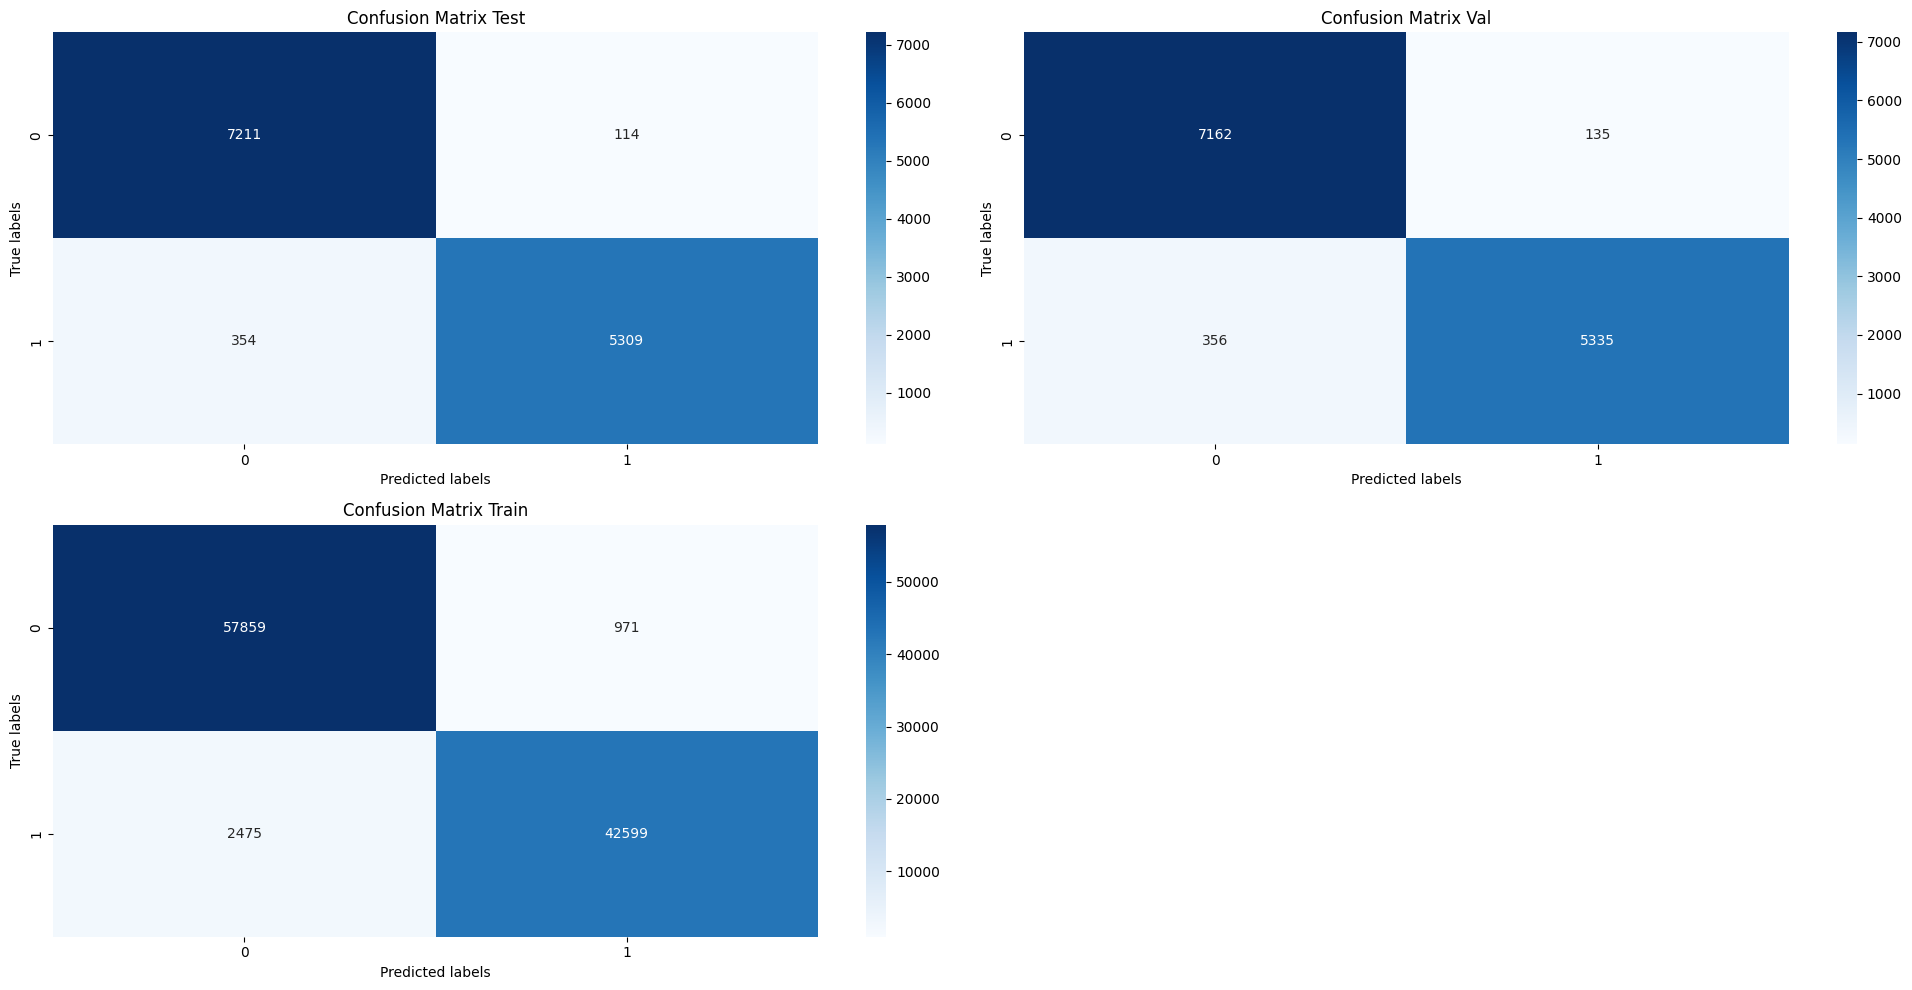

In [57]:
plt.figure(figsize=(20, 10))

# Confusion Matrix for Test Set
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Test')

# Confusion Matrix for Validation Set
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_val, y_pred_val_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Val')

# Confusion Matrix for Train Set
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_train, y_pred_train_binary), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Train')

plt.tight_layout()
plt.show()

In [58]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      7325
         1.0       0.98      0.94      0.96      5663

    accuracy                           0.96     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



In [59]:
print(classification_report(y_train, y_pred_train_binary))


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     58830
         1.0       0.98      0.95      0.96     45074

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



In [60]:
print(classification_report(y_val, y_pred_val_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      7297
         1.0       0.98      0.94      0.96      5691

    accuracy                           0.96     12988
   macro avg       0.96      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



In [61]:
print(f'Acuracy: {accuracy_score(y_test, y_pred_binary)}')

Acuracy: 0.9639667385278718


In [62]:
#cost
print(f'F1 Score: {f1_score(y_test, y_pred_binary)}')

F1 Score: 0.9577845931805882


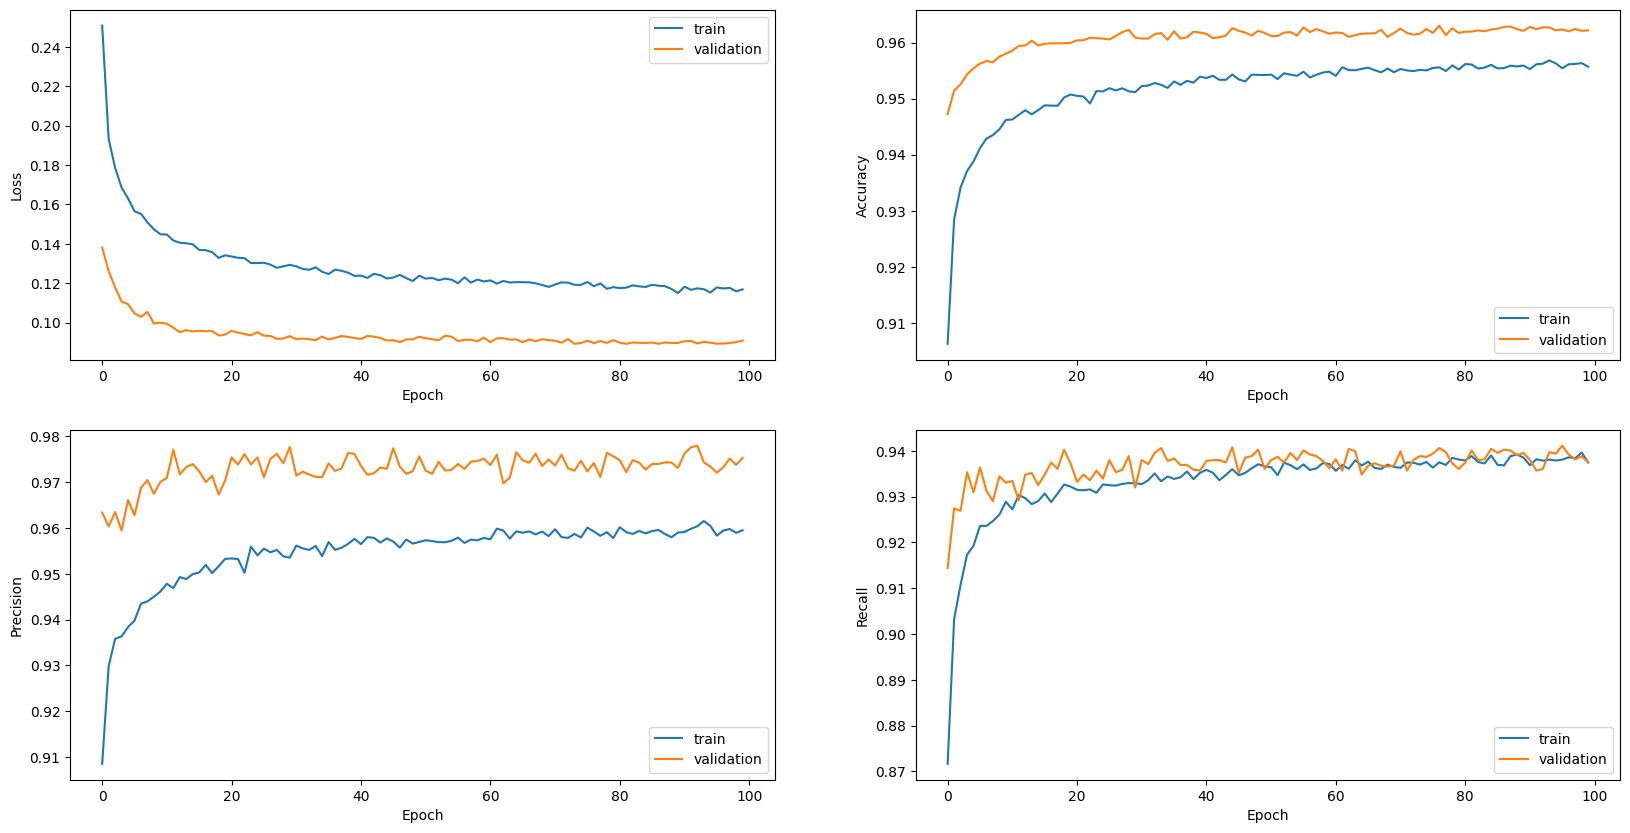

In [66]:
# Plot loss, accuracy, precision, and recall
plt.figure(figsize=(20, 10))

# Plot loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot precision
plt.subplot(2, 2, 3)
plt.plot(history.history['precision_1'], label='train')
plt.plot(history.history['val_precision_1'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot recall
plt.subplot(2, 2, 4)
plt.plot(history.history['recall_1'], label='train')
plt.plot(history.history['val_recall_1'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.show()

In [67]:
# Evaluate model
train_loss, train_accuracy, train_precision, train_recall = model.evaluate(tf_X_train, tf_y_train)
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(tf_X_val, tf_y_val)
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(tf_X_test, tf_y_test)



3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - binary_accuracy: 0.9673 - loss: 0.0796 - precision_1: 0.9785 - recall_1: 0.9454
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9606 - loss: 0.0965 - precision_1: 0.9730 - recall_1: 0.9373
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9659 - loss: 0.0860 - precision_1: 0.9824 - recall_1: 0.9383


In [68]:
# Create DataFrame to display results
results = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Loss': [train_loss, val_loss, test_loss],
    'Accuracy': [train_accuracy, val_accuracy, test_accuracy],
    'Precision': [train_precision, val_precision, test_precision],
    'Recall': [train_recall, val_recall, test_recall]
})

# Print results table
print(results)

          Set      Loss  Accuracy  Precision    Recall
0       Train  0.079508  0.966835   0.977714  0.945090
1  Validation  0.090824  0.962196   0.975320  0.937445
2        Test  0.087528  0.963967   0.978978  0.937489
